Assignment on Regression technique.
Download temperature data from below link. https://www.kaggle.com/venky73/temperaturesof-india?select=temperatures.csv This data consists of temperatures of INDIA averaging the temperatures of all places month wise. Temperatures values are recorded in CELSIUS

a) Apply Linear Regression using suitable library function and predict the Month-wise temperature.

b) Assess the performance of regression models using MSE, MAE and R-Square metrics

c) Visualize simple regression model.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


In [2]:
df = pd.read_csv('temperatures.csv')
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


**Preprocessing**


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     117 non-null    int64  
 1   JAN      117 non-null    float64
 2   FEB      117 non-null    float64
 3   MAR      117 non-null    float64
 4   APR      117 non-null    float64
 5   MAY      117 non-null    float64
 6   JUN      117 non-null    float64
 7   JUL      117 non-null    float64
 8   AUG      117 non-null    float64
 9   SEP      117 non-null    float64
 10  OCT      117 non-null    float64
 11  NOV      117 non-null    float64
 12  DEC      117 non-null    float64
 13  ANNUAL   117 non-null    float64
 14  JAN-FEB  117 non-null    float64
 15  MAR-MAY  117 non-null    float64
 16  JUN-SEP  117 non-null    float64
 17  OCT-DEC  117 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 16.6 KB


In [4]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [5]:
df.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [6]:
print(df.columns)

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')


In [7]:
month_cols = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
melted_df = df.melt(id_vars=['YEAR'], value_vars=month_cols, var_name='Month', value_name='Temperature')


In [8]:
month_mapping = {month: idx + 1 for idx, month in enumerate(month_cols)}
melted_df['Month'] = melted_df['Month'].map(month_mapping)


In [9]:
X = melted_df[['Month']]
y = melted_df['Temperature']

In [10]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [14]:
print("Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Performance Metrics:
Mean Squared Error (MSE): 10.00
Mean Absolute Error (MAE): 2.71
R² Score: -0.01


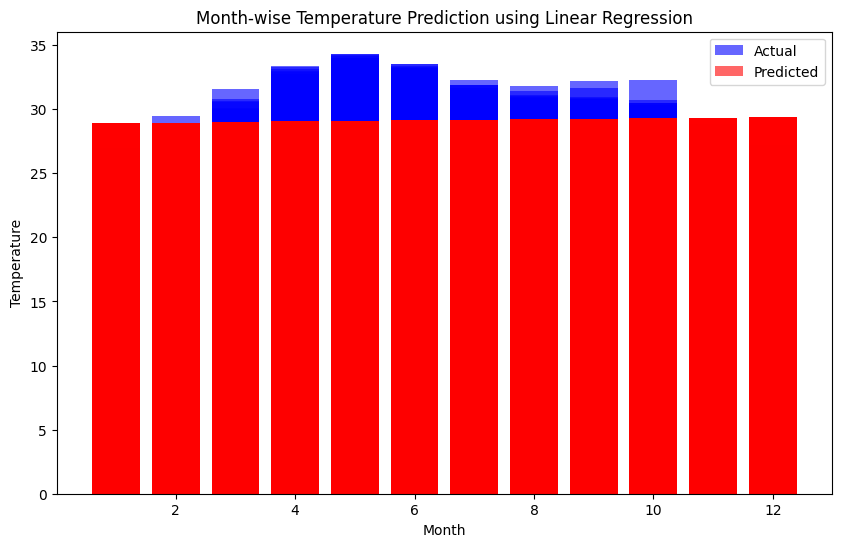

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(X_test.squeeze(), y_test, label="Actual", alpha=0.6, color='blue')
plt.bar(X_test.squeeze(), y_pred, label="Predicted", alpha=0.6, color='red')
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.title("Month-wise Temperature Prediction using Linear Regression")
plt.legend()
plt.show()

Improved Performance Metrics:
Mean Squared Error (MSE): 1.01
Mean Absolute Error (MAE): 0.69
R² Score: 0.89


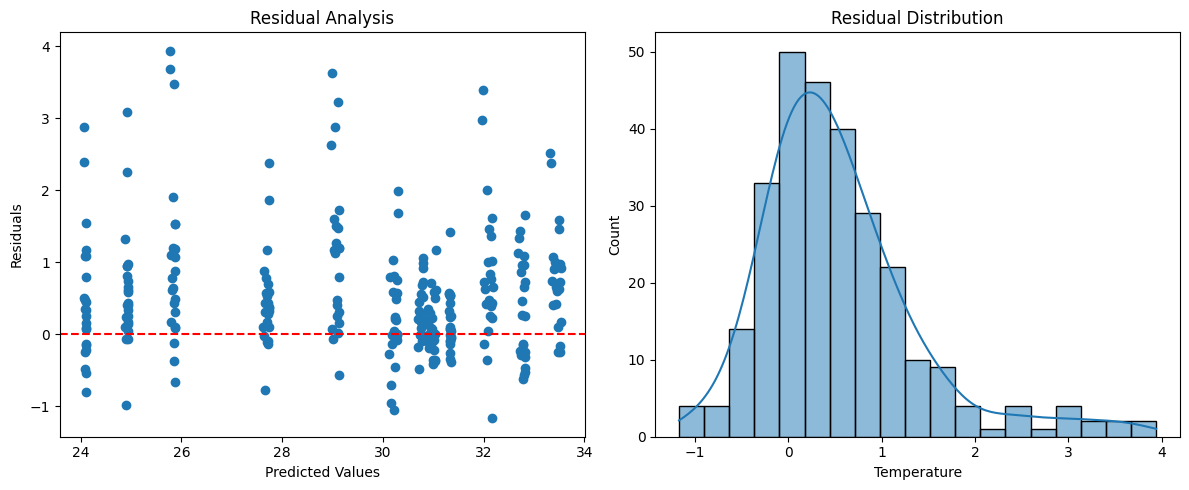

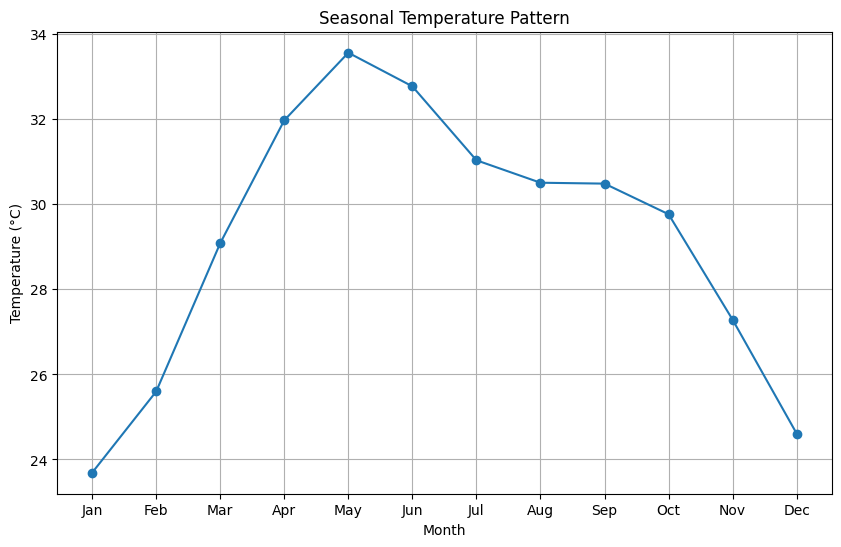

In [16]:
# ... (previous imports)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 1. Enhanced Data Preparation
# Convert months to cyclical features (sine/cosine)
melted_df['Month_sin'] = np.sin(2 * np.pi * melted_df['Month']/12)
melted_df['Month_cos'] = np.cos(2 * np.pi * melted_df['Month']/12)

# Add year as a feature
melted_df['Year'] = melted_df['YEAR']

# Sort data chronologically
melted_df = melted_df.sort_values(['Year', 'Month'])

# 2. Time-based Split (prevent lookahead bias)
test_size = 0.2
split_idx = int(len(melted_df) * (1 - test_size))
X_train = melted_df[['Month_sin', 'Month_cos', 'Year']].iloc[:split_idx]
y_train = melted_df['Temperature'].iloc[:split_idx]
X_test = melted_df[['Month_sin', 'Month_cos', 'Year']].iloc[split_idx:]
y_test = melted_df['Temperature'].iloc[split_idx:]

# 3. Polynomial Regression Model
model = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression()
)
model.fit(X_train, y_train)

# 4. Enhanced Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Improved Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 5. Residual Analysis
residuals = y_test - y_pred

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')

plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.tight_layout()
plt.show()

# 6. Trend Visualization
months = melted_df['Month'].unique()
avg_temp = melted_df.groupby('Month')['Temperature'].mean()

plt.figure(figsize=(10, 6))
plt.plot(months, avg_temp, 'o-', label='Actual Average')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Seasonal Temperature Pattern')
plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()